In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import h5py

import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |
      |                  TABLES Version 3.18.3                     |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+
tables/:
 fitsio/        tbplot/         tobsolete/      ttools/


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |


In [2]:
z_tng = 0.4
h_tng = 0.704

In [3]:
Group_IDs = [ 29, 284, 132, 269,  73, 154,  86, 211, 201,  94,  67, 160, 260, 199, 5, 163, 147, 7, 384, 2, 37,
             74, 31, 198, 178, 17, 77, 222, 164,  80, 221,  57, 189,  96, 327, 100, 220,  11, 128, 273, 424,
             360, 122,  79, 194,  70, 149, 412,  55, 334, 104, 153, 546, 140, 459,  66, 114, 28, 170, 159, 63,
             52, 123, 84, 36, 204, 380, 38, 197, 351, 15, 22, 243, 54, 145,  82, 113, 332,  69, 193,  95, 331,
             44, 363, 339, 150, 195,  46,  48, 56, 214]

In [4]:
FOF_particles_file_location = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'
f = h5py.File(FOF_particles_file_location, 'r')
FOF_galaxy_IDS = f['catgrp_id'].value
M200 = np.array(f['catgrp_Group_M_Crit200']) # in solar masses
f.close()

In [5]:
#load isos
full_particles_isos = np.load('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/full_particles/full_particle_isos.npy')

fof_particles_isos = np.load('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/full_particles/fof_particle_isos.npy')


In [6]:
def get_median_profile(isos, pixel_scale, r_bins, quantity = 'intens', R200=None):
    """Get the median profiles."""
    
    if quantity == 'intens':
        mu = np.nanmedian(np.stack([interp1d((gal['sma'] * pixel_scale) ** 0.25, 
                                               np.log10(gal[quantity] / (pixel_scale ** 2)),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(r_bins) 
                               for gal in isos]), axis=0)
    if quantity == 'intens_kpc':
        if R200 is not None:
            mu = np.nanmedian(np.stack([interp1d(np.log10(gal['sma_kpc']/r200), 
                                                   np.log10(gal[quantity]),
                                                   bounds_error=False, 
                                                   fill_value=np.nan, 
                                                   kind='slinear')(r_bins) 
                                   for gal,r200 in zip(isos,R200)]), axis=0)   
        else:    
            mu = np.nanmedian(np.stack([interp1d((gal['sma_kpc']) ** 0.25, 
                                                   np.log10(gal[quantity]),
                                                   bounds_error=False, 
                                                   fill_value=np.nan, 
                                                   kind='slinear')(r_bins) 
                                   for gal in isos]), axis=0)
    elif quantity == 'growth_ori':
        mu = np.nanmedian(np.stack([interp1d((gal['sma_kpc']) ** 0.25, 
                                               np.log10(gal[quantity]),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(r_bins) 
                               for gal in isos]), axis=0)
        
#     elif quantity == 'hsc':
#         mu = np.nanmedian(np.stack([interp1d(SMA_COMMON, 
#                                                gal,
#                                                bounds_error=False, 
#                                                fill_value=np.nan, 
#                                                kind='slinear')(r_bins) 
#                                for gal in isos]), axis=0)


    return mu

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


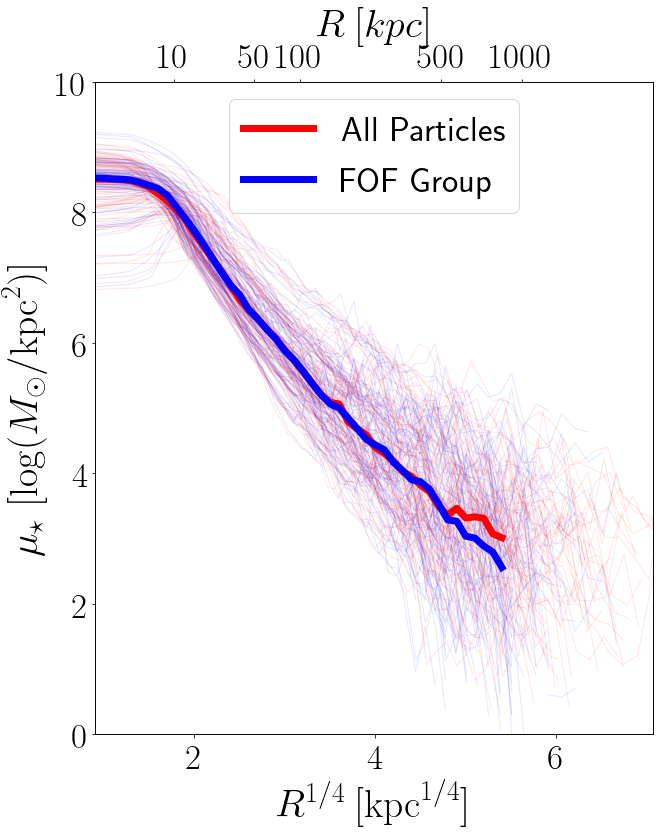

In [7]:
fig = plt.figure(figsize=(10, 12))
ax1 = plt.subplot()
hsc_sma = np.arange(0.4, 5.5, 0.1)
    

for i in range(len(Group_IDs)):
    full_particles_iso = full_particles_isos[i]
    fof_particles_iso = fof_particles_isos[i]
    
#     if (np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0))[0]>8:

    ax1.plot((full_particles_iso['sma_kpc'] ) ** 0.25,
                 np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=0.1, 
                     color = 'r', label='_nolegend_')

    ax1.plot((fof_particles_iso['sma_kpc'] ) ** 0.25,
                 np.log10(fof_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=0.1, 
                     color = 'b', label='_nolegend_')

                 #label='tng Galaxy '+
## median profiles for tng
median_mu_full = get_median_profile(full_particles_isos, pixel_scale = 0, r_bins = hsc_sma, quantity = 'intens_kpc')
median_mu_FOF = get_median_profile(fof_particles_isos, pixel_scale = 0, r_bins = hsc_sma, quantity = 'intens_kpc')

ax1.plot(hsc_sma, median_mu_full+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='r',
         label = 'All Particles')
ax1.plot(hsc_sma, median_mu_FOF+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='b',
         label='FOF Group')

######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 2500**0.25)
ax1.set_ylim(0, 10)

ax1.tick_params(axis='both', which='major', labelsize=35)

ax1.legend(loc= 'upper center', fontsize=35)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([10**0.25, 50**0.25, 100**0.25, 500**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([r'$10$', r'$50$', r'$100$', r'$500$', r'$1000$'])
ax1_twin.tick_params(axis='both', which='major', labelsize=35)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=40)


ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot}/\mathrm{kpc}^2)]$', fontsize=40)
ax1.set_xlabel(r'$R^{1/4} \: [\mathrm{kpc}^{1/4}]$', fontsize=40)

#     fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/profiles_matched_by_{0}_{1}.pdf'.format(mass_type, sim_name),
#                 dpi=100, format='pdf', bbox_inches='tight')

plt.show()

In [8]:
from astropy.cosmology import Planck13 as cosmo
from astropy import units as u
from __future__ import division

rho_crit = cosmo.critical_density(0.4).to(u.solMass/u.kpc**3).value
R200 = (M200*(3/4) / (np.pi) / (200*rho_crit) ) **(1/3) #in kpc

R200_sample = [R200[np.where(FOF_galaxy_IDS==Group_ID)[0][0]] for Group_ID in Group_IDs]

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10


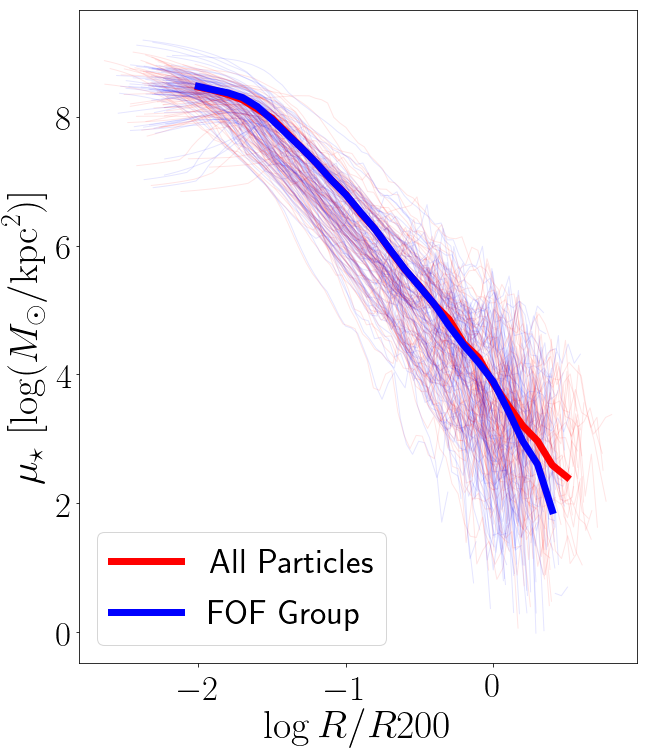

In [9]:
fig = plt.figure(figsize=(10, 12))
ax1 = plt.subplot()
logr200_bins = np.arange(-2, 0.6, 0.1)
    
for i in range(len(Group_IDs)):
    full_particles_iso = full_particles_isos[i]
    fof_particles_iso = fof_particles_isos[i]
    
    r200 = R200[i]

    ax1.plot(np.log10(full_particles_iso['sma_kpc']/r200 ),
                 np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=0.1, 
                     color = 'r', label='_nolegend_')

    ax1.plot(np.log10(fof_particles_iso['sma_kpc']/r200 ),
                 np.log10(fof_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=0.1, 
                     color = 'b', label='_nolegend_')
        
                 #label='tng Galaxy '+
## median profiles for tng
median_mu_full = get_median_profile(full_particles_isos, pixel_scale = 1, r_bins = logr200_bins,
                                    quantity = 'intens_kpc', R200=R200_sample)
median_mu_FOF = get_median_profile(fof_particles_isos, pixel_scale = 1, r_bins = logr200_bins,
                                   quantity = 'intens_kpc', R200=R200_sample)

ax1.plot(logr200_bins, median_mu_full+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='r',
         label = 'All Particles')
ax1.plot(logr200_bins, median_mu_FOF+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='b',
         label='FOF Group')

######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 2500**0.25)
# ax1.set_ylim(0, 10)

ax1.tick_params(axis='both', which='major', labelsize=35)

ax1.legend(loc= 'best', fontsize=35)


ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot}/\mathrm{kpc}^2)]$', fontsize=40)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=40)


plt.show()

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


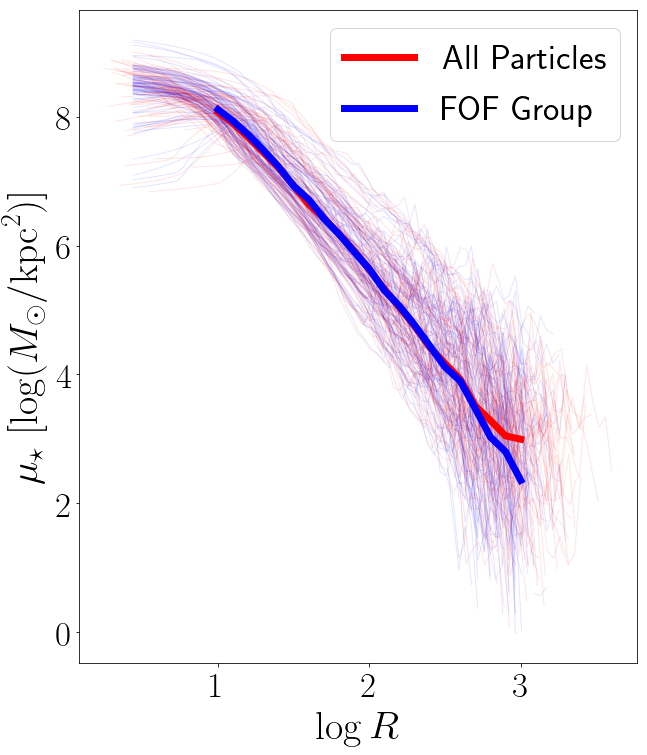

In [44]:
fig = plt.figure(figsize=(10, 12))
ax1 = plt.subplot()
logr200_bins = np.arange(1, 3.1, 0.1)
converted_logr200_bins = ((10**(logr200_bins))**0.25)
    
for i in range(len(Group_IDs)):
    full_particles_iso = full_particles_isos[i]
    fof_particles_iso = fof_particles_isos[i]
    
    r200 = R200[i]

    ax1.plot(np.log10(full_particles_iso['sma_kpc'] ),
                 np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=0.1, 
                     color = 'r', label='_nolegend_')

    ax1.plot(np.log10(fof_particles_iso['sma_kpc'] ),
                 np.log10(fof_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=0.1, 
                     color = 'b', label='_nolegend_')
        
                 #label='tng Galaxy '+
## median profiles for tng
median_mu_full = get_median_profile(full_particles_isos, pixel_scale = 1, r_bins = converted_logr200_bins,
                                    quantity = 'intens_kpc')
median_mu_FOF = get_median_profile(fof_particles_isos, pixel_scale = 1, r_bins = converted_logr200_bins,
                                   quantity = 'intens_kpc')

ax1.plot(logr200_bins, median_mu_full+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='r',
         label = 'All Particles')
ax1.plot(logr200_bins, median_mu_FOF+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='b',
         label='FOF Group')

######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 2500**0.25)
# ax1.set_ylim(0, 10)

ax1.tick_params(axis='both', which='major', labelsize=35)

ax1.legend(loc= 'best', fontsize=35)


ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot}/\mathrm{kpc}^2)]$', fontsize=40)
ax1.set_xlabel(r'$\log {R} $', fontsize=40)


plt.show()

In [20]:
np.random.seed(92)
random_indices_tng = np.random.randint(0, len(full_particles_iso), size=5)
print random_indices_tng

random_full_isos = [full_particles_isos[i] for i in random_indices_tng]
random_fof_isos = [fof_particles_isos[i] for i in random_indices_tng]

[58 42  3 18 11]


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10


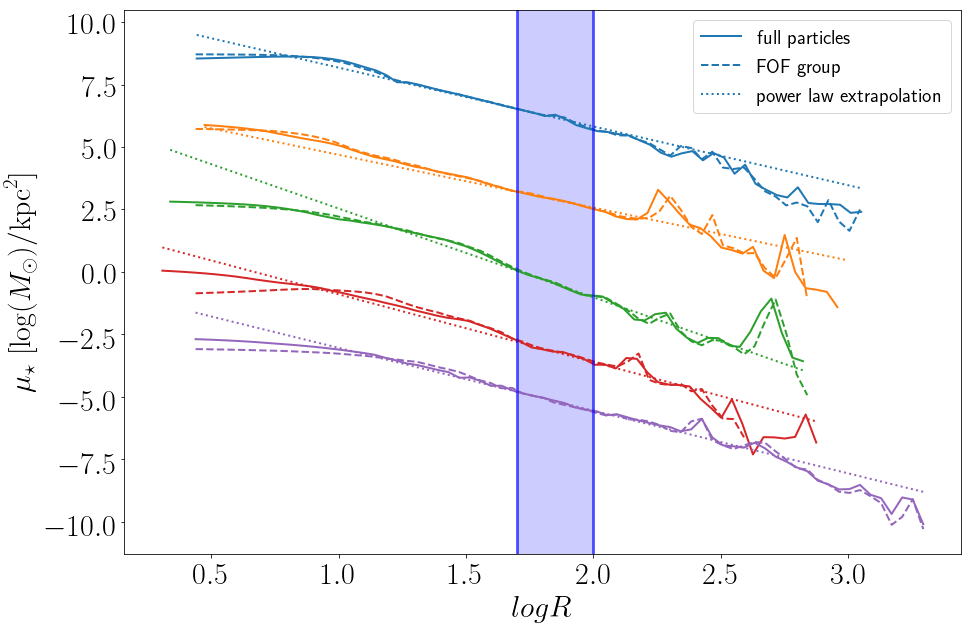

In [36]:
initial_r, final_r =50, 100
    
#plot
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################

for i in range(len(random_full_isos)): 
        full_iso = random_full_isos[i]
        fof_iso = random_fof_isos[i]

        ngals1+=1

        mu_full_plot = ax1.plot(np.log10(full_iso['sma_kpc']), np.log10(full_iso['intens_kpc'])-i*3, 
                           linewidth=2, alpha=1, label='full particles', zorder=1)
        ax1.plot(np.log10(fof_iso['sma_kpc']),
                 np.log10(fof_iso['intens_kpc'])-i*3, 
                 linewidth=2, alpha=1, label='FOF group', zorder=1, c=mu_full_plot[0].get_color(),
                 linestyle='--')
        ax1.plot(np.log10(full_iso['sma_kpc']),
                 np.log10(mu_extrap(full_iso,initial_r, final_r))-i*3 - np.log10(0.7 ** 2.0), 
                 linewidth=2, linestyle=':', alpha=1, c=mu_full_plot[0].get_color(),
                 label='power law extrapolation', zorder=1)



## median profiles for illustris
# median_sma1, median_mu1 = get_median_profile(illustris_isos, quantity = 'ratio',
#                                              pixel_scale = pixel_scale, rmin=50**0.25, rmax=800.**0.25)

#ax1.plot(median_sma1, median_mu1, linewidth=4.0, c=u'#d62728', alpha=1, label='Illustris', zorder=8)


#     print ngals1


# ######################################################################################################################
# # plot details
# ######################################################################################################################
# # X-Y limits
# ax1.set_xlim(-1, 1)
# ax1.set_ylim(-4, 9)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:3], labels[:3], fontsize=20)

# #add twin x axis in kpc
# x1, x2 = ax1.get_xlim()
# ax1_twin = ax1.twiny()
# ax1_twin.set_xlim(x1, x2)
# ax1_twin.figure.canvas.draw()
# ax1_twin.xaxis.set_ticks([50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
# ax1_twin.xaxis.set_ticklabels([50, 100, 200, 300, 500, 800, 1000])
# ax1_twin.tick_params(axis='both', which='major', labelsize=15)
# ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$log R $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
#ax1.set_title('5 randomly selected profiles and extrapolations', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

ax1.axvline(np.log10(initial_r), linestyle='-', linewidth=3.0, alpha=0.6, c='b')
ax1.axvline(np.log10(final_r), linestyle='-', linewidth=3.0, alpha=0.6, c='b')
ax1.axvspan(np.log10(initial_r), np.log10(final_r), alpha=0.2, color='b')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10


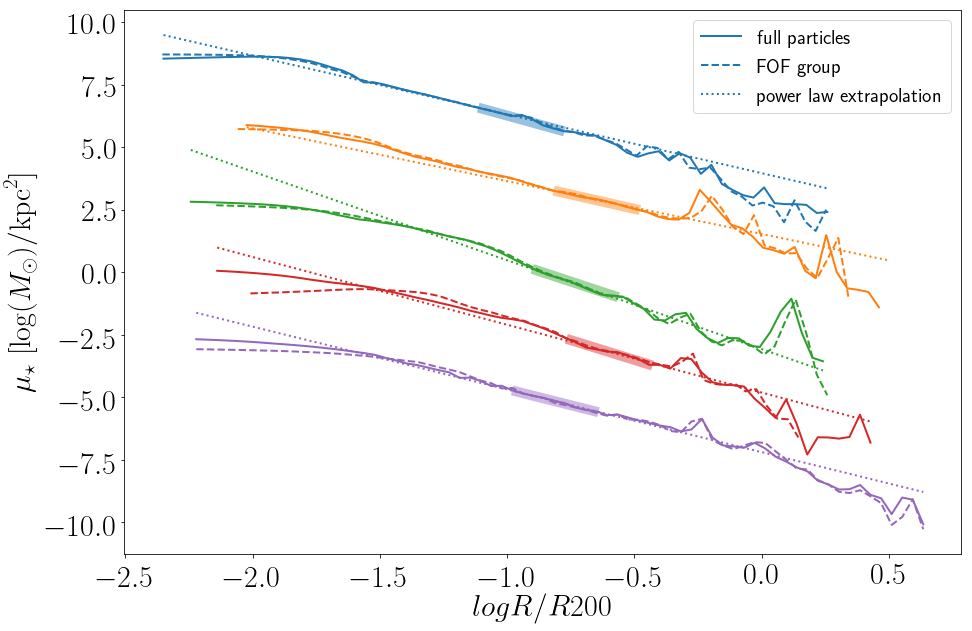

In [64]:
initial_r, final_r =50, 100
    
#plot
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################

for i in range(len(random_full_isos)): 
        full_iso = random_full_isos[i]
        fof_iso = random_fof_isos[i]
        r200 = R200_sample[i]

        ngals1+=1

        mu_full_plot = ax1.plot(np.log10(full_iso['sma_kpc']/r200), np.log10(full_iso['intens_kpc'])-i*3, 
                           linewidth=2, alpha=1, label='full particles', zorder=1)
        ax1.plot(np.log10(fof_iso['sma_kpc']/r200),
                 np.log10(fof_iso['intens_kpc'])-i*3, 
                 linewidth=2, alpha=1, label='FOF group', zorder=1, c=mu_full_plot[0].get_color(),
                 linestyle='--')
        #plot power law
        ax1.plot(np.log10(full_iso['sma_kpc']/r200),
                 np.log10(mu_extrap_with_R200(full_iso, r200, initial_r, final_r))-i*3, 
                 linewidth=2, linestyle=':', alpha=1, c=mu_full_plot[0].get_color(),
                 label='power law extrapolation', zorder=1)
        
        #plot region where power law is being fit (50-100kpc)
        ax1.plot(np.log10([50,100]/r200),
                 np.interp([50,100],full_iso['sma_kpc'],np.log10(full_iso['intens_kpc']))-i*3,
                 c=mu_full_plot[0].get_color(), linewidth=10, alpha=0.45 )


## median profiles for illustris
# median_sma1, median_mu1 = get_median_profile(illustris_isos, quantity = 'ratio',
#                                              pixel_scale = pixel_scale, rmin=50**0.25, rmax=800.**0.25)

#ax1.plot(median_sma1, median_mu1, linewidth=4.0, c=u'#d62728', alpha=1, label='Illustris', zorder=8)


#     print ngals1


# ######################################################################################################################
# # plot details
# ######################################################################################################################
# # X-Y limits
# ax1.set_xlim(-1, 1)
# ax1.set_ylim(-4, 9)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:3], labels[:3], fontsize=20)

# #add twin x axis in kpc
# x1, x2 = ax1.get_xlim()
# ax1_twin = ax1.twiny()
# ax1_twin.set_xlim(x1, x2)
# ax1_twin.figure.canvas.draw()
# ax1_twin.xaxis.set_ticks([50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
# ax1_twin.xaxis.set_ticklabels([50, 100, 200, 300, 500, 800, 1000])
# ax1_twin.tick_params(axis='both', which='major', labelsize=15)
# ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$log R/R200 $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
#ax1.set_title('5 randomly selected profiles and extrapolations', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

# ax1.axvline(np.log10(initial_r), linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvline(np.log10(final_r), linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvspan(np.log10(initial_r), np.log10(final_r), alpha=0.2, color='b')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

In [63]:
def mu_extrap_with_R200(iso, r200, ini_r=50, final_r=100):
    power_law_iso = powerlaw(iso['sma_kpc']/r200,*fit_power_law_to_iso_with_R200(iso, ini_r, final_r, r200))
    return power_law_iso

def fit_power_law_to_iso_with_R200(iso, ini_r, final_r, r200):

    x=iso['sma_kpc'][(iso['sma_kpc']>ini_r) & (iso['sma_kpc']<final_r)]/r200
    y=iso['intens_kpc'][(iso['sma_kpc']>ini_r) & (iso['sma_kpc']<final_r)]

    p_fit_power, _ = curve_fit(powerlaw, x, y, p0=[-2,10**10])

    return p_fit_power

In [68]:
#get extrapolation for each galaxy
extrapolated_mus = [mu_extrap_with_R200(iso, r200, ini_r=50, final_r=100) for iso, r200 in zip(full_particles_isos,R200)]


0


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10


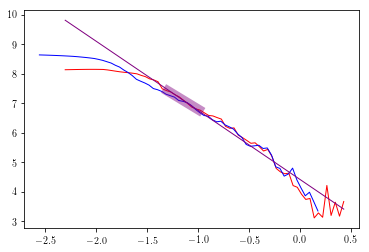

1


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


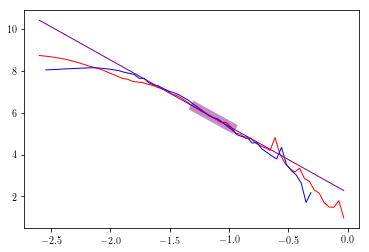

2


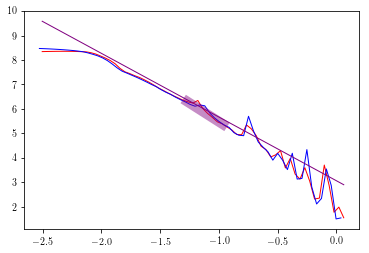

3


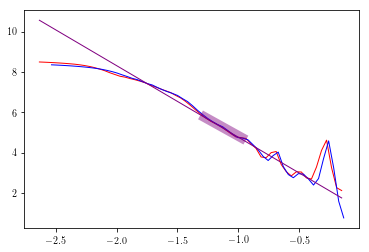

4


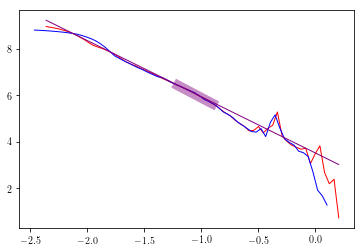

5


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log10


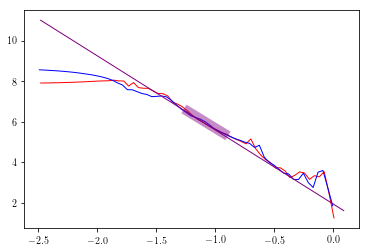

6


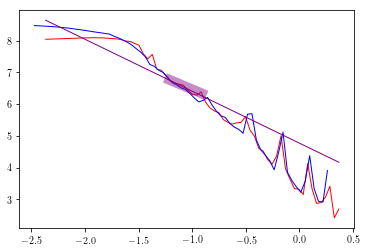

7


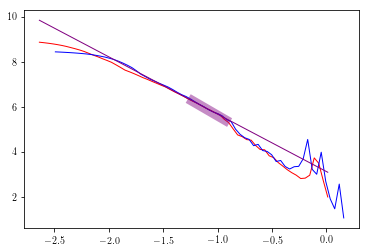

8


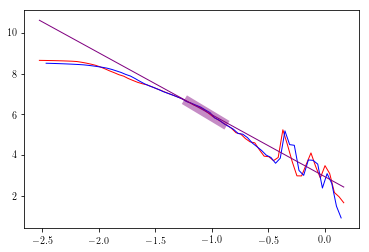

9


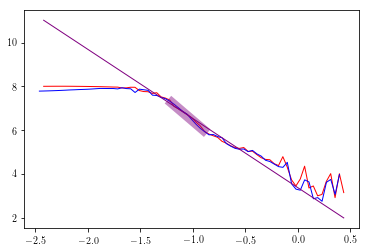

10


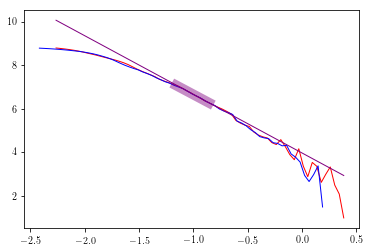

11


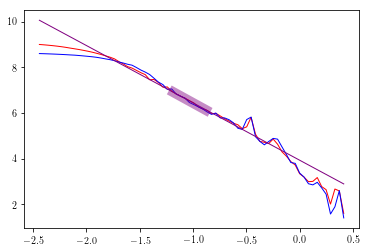

12


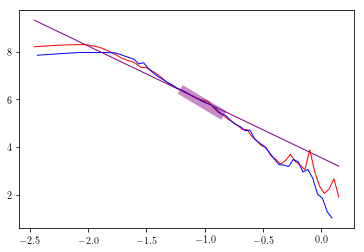

13


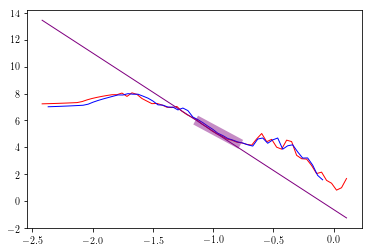

14


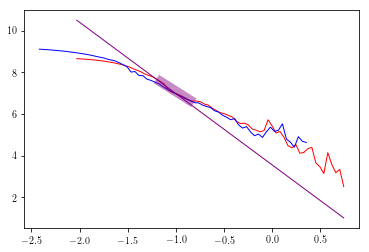

15


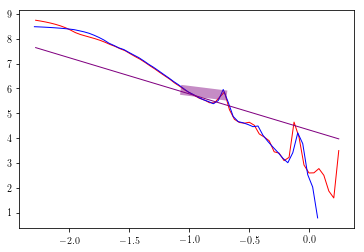

16


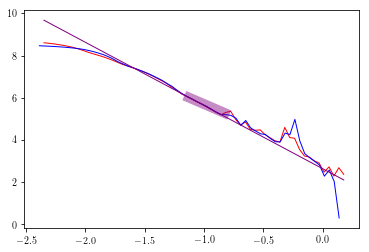

17


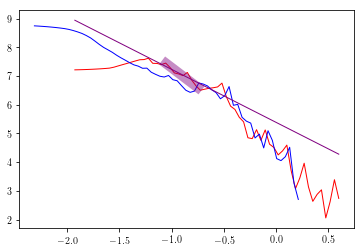

18


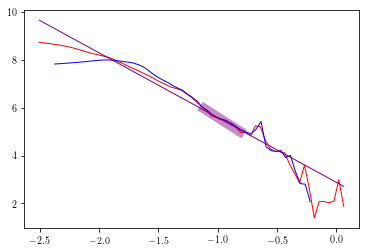

19


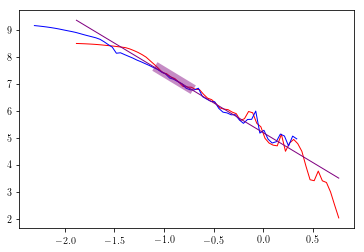

20


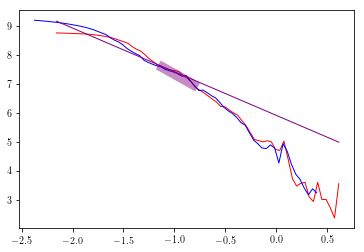

21


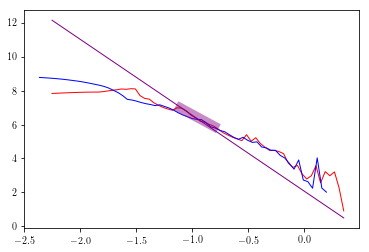

22


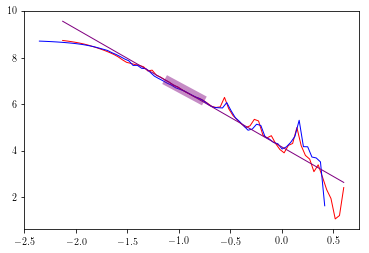

23


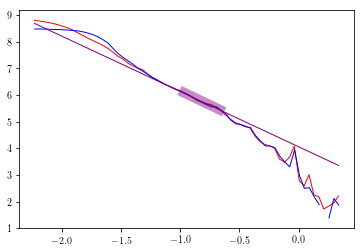

24


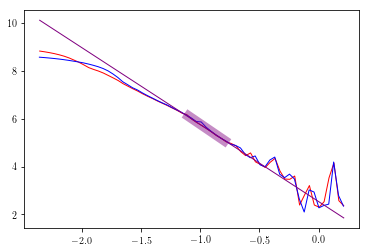

25


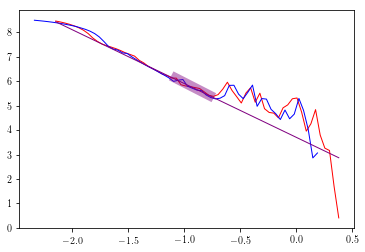

26


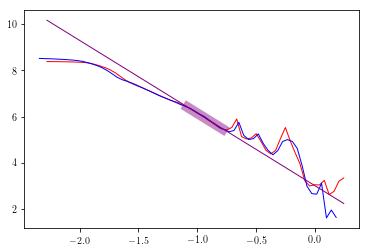

27


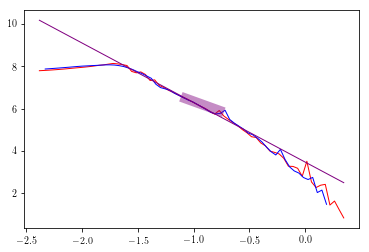

28


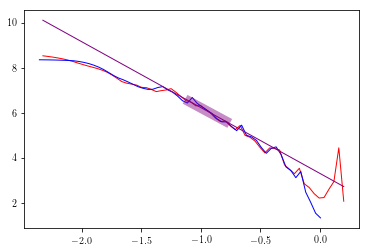

29


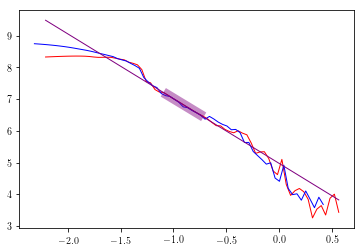

30


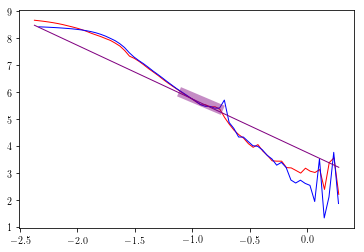

31


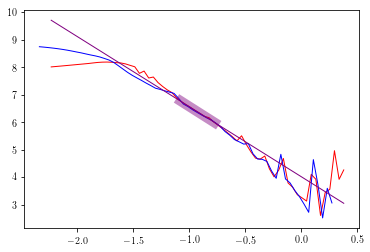

32


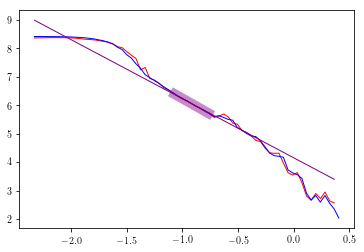

33


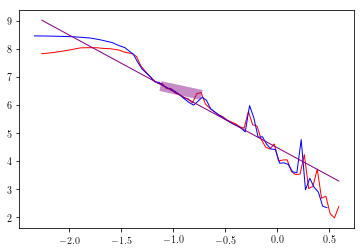

34


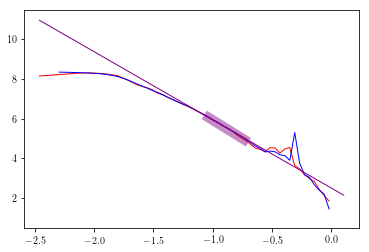

35


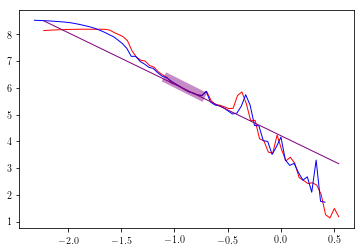

36


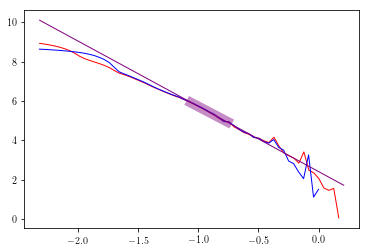

37


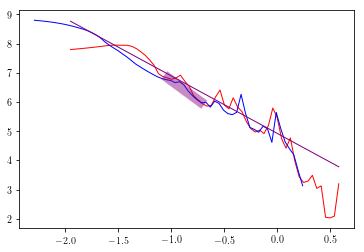

38


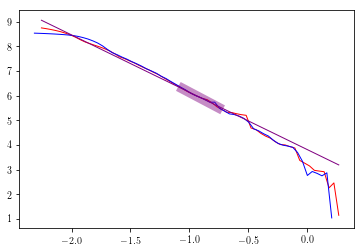

39


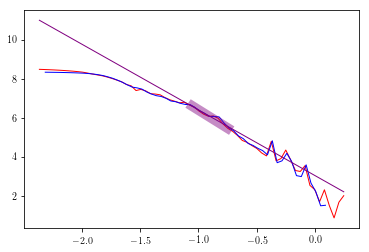

40


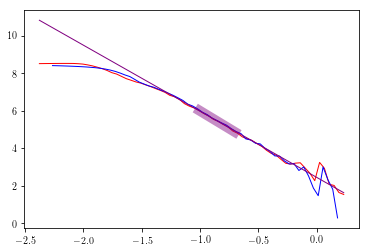

41


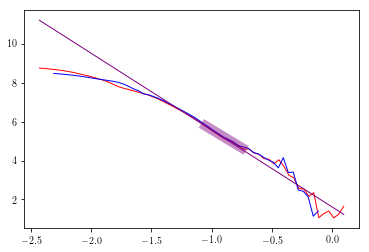

42


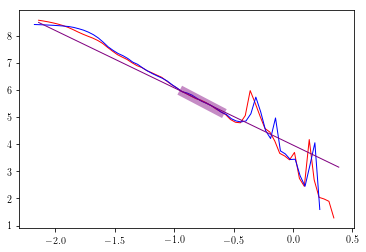

43


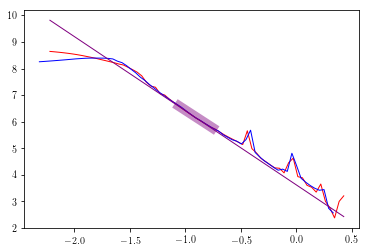

44


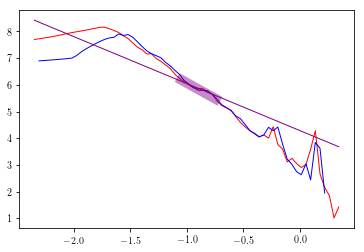

45


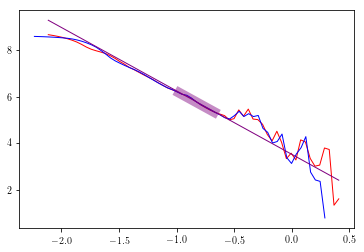

46


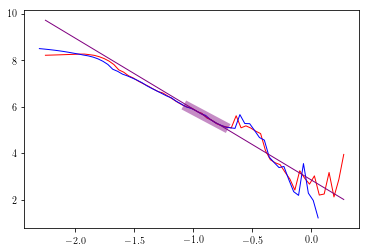

47


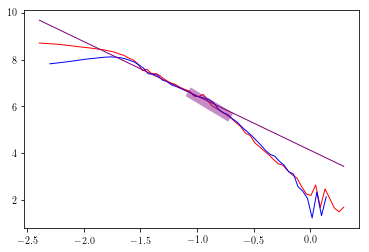

48


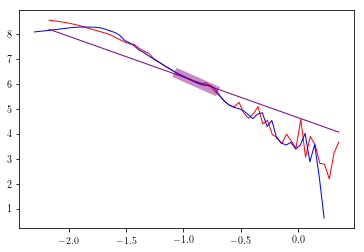

49


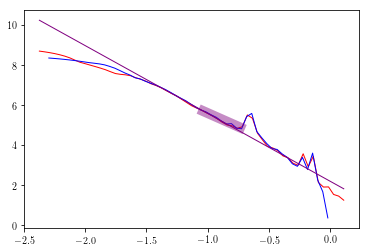

50


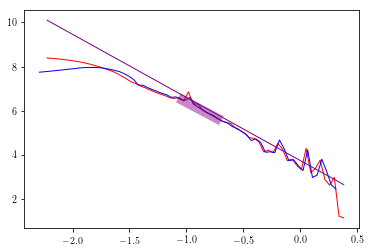

51


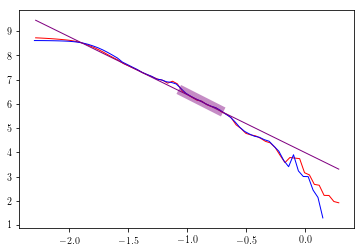

52


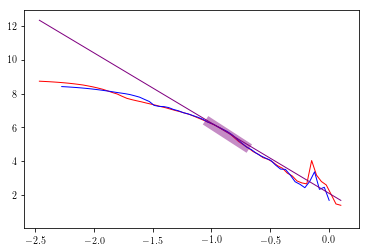

53


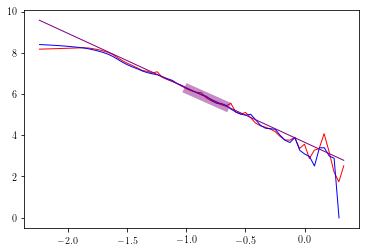

54


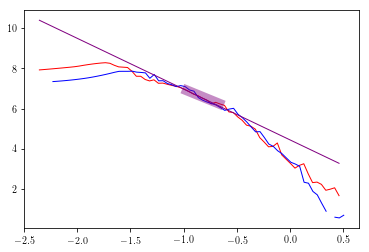

55


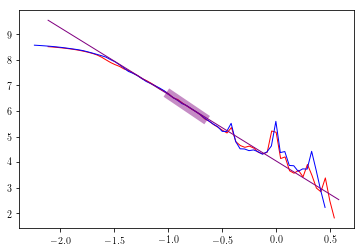

56


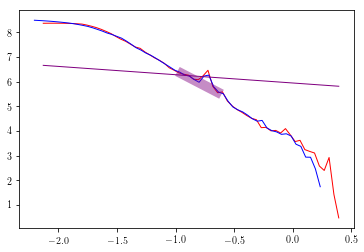

57


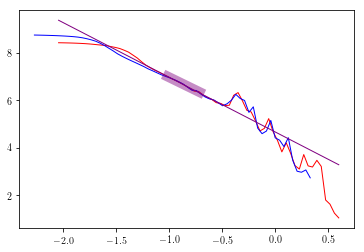

58


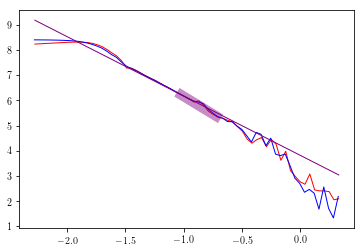

59


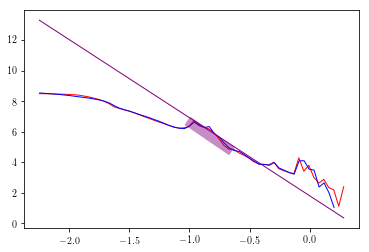

60


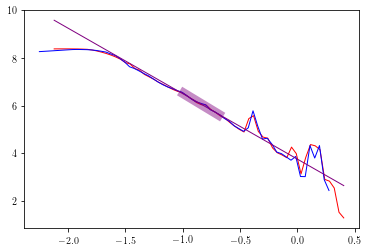

61


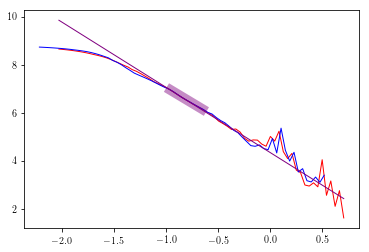

62


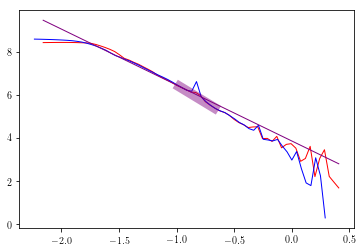

63


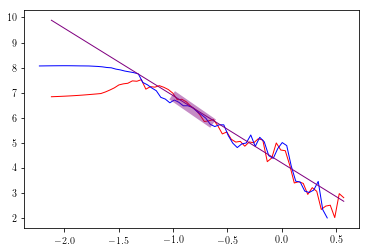

64


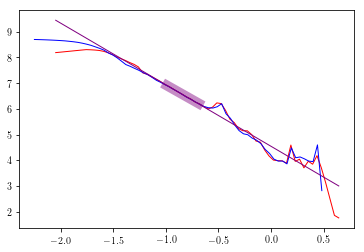

65


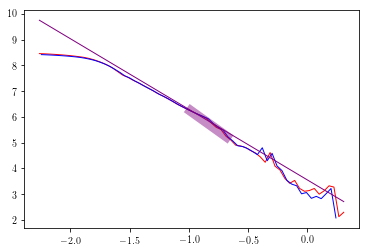

66


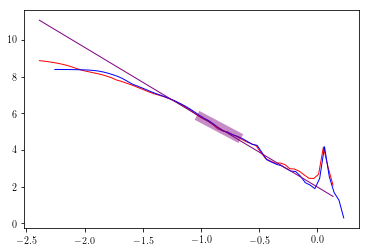

67


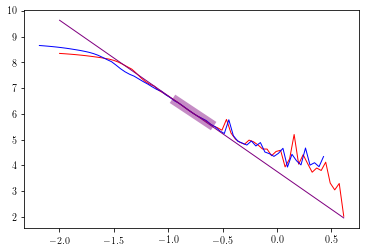

68


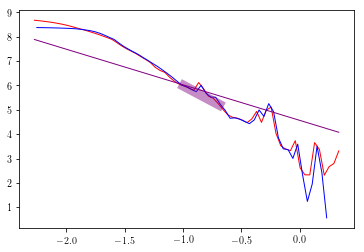

69


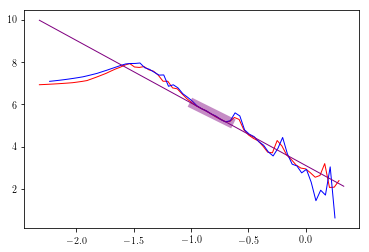

70


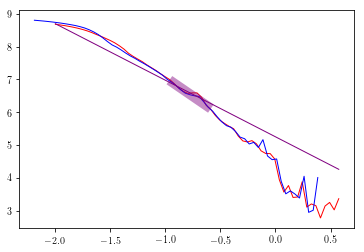

71


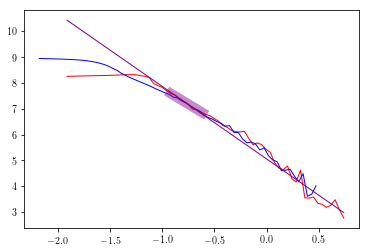

72


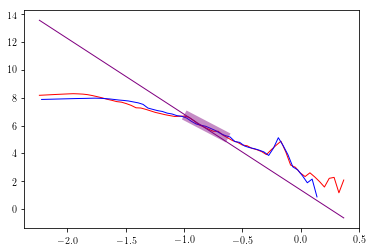

73


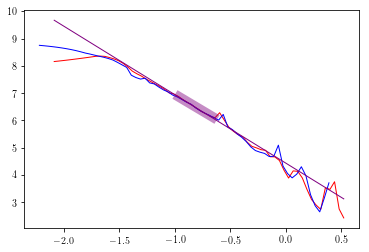

74


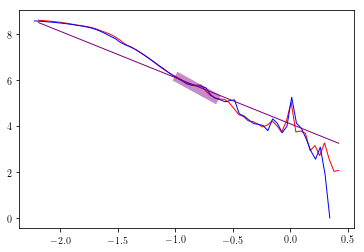

75


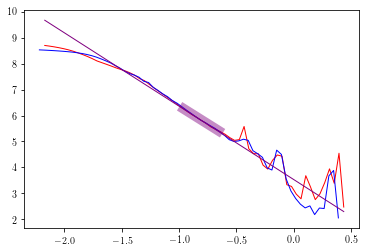

76


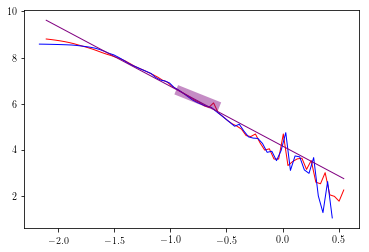

77


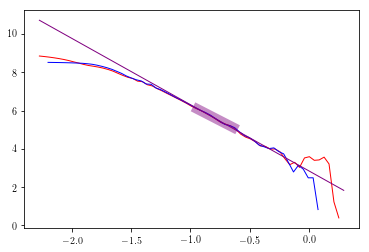

78


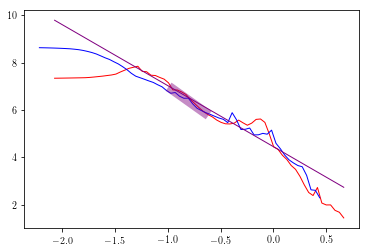

79


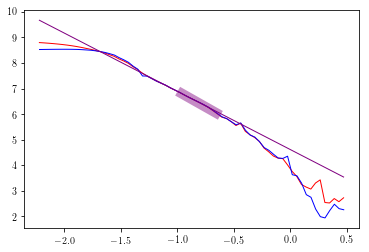

80


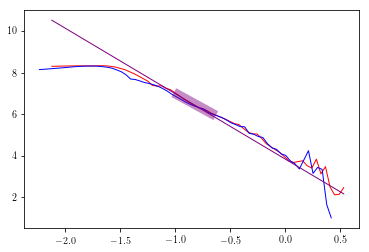

81


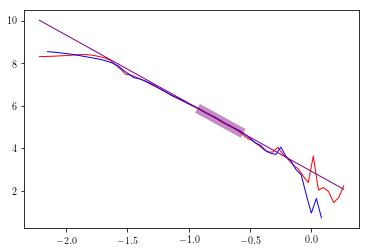

82


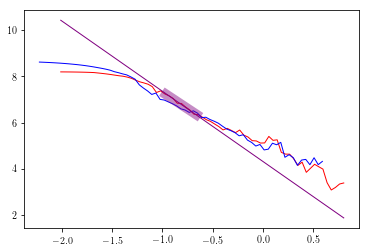

83


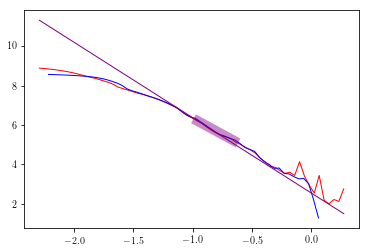

84


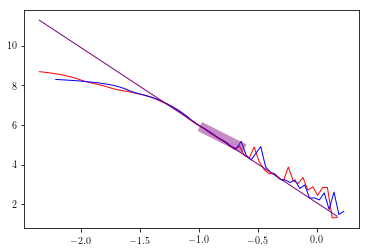

85


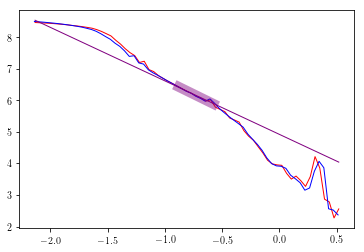

86


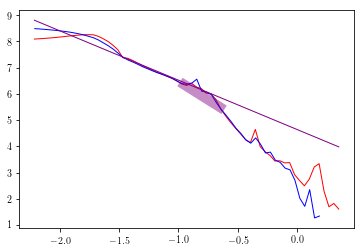

87


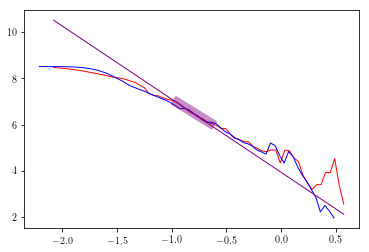

88


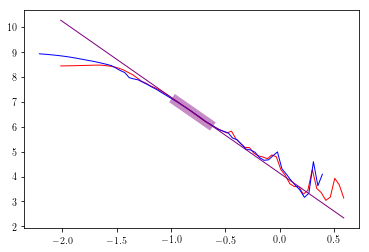

89


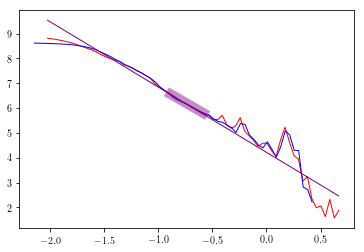

90


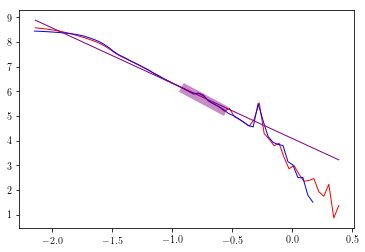

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in log10


In [114]:
# fig = plt.figure(figsize=(10, 12))
ax1 = plt.subplot()
logr200_bins = np.arange(-2, 0.6, 0.1)
    
for i in range(len(Group_IDs)):
    print(i)
    full_particles_iso = full_particles_isos[i]
    fof_particles_iso = fof_particles_isos[i]
    
    r200 = R200[i]
    extrapolated_mu = extrapolated_mus[i]
    ax1 = plt.subplot()

    ax1.plot(np.log10(full_particles_iso['sma_kpc']/r200 ),
                 np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=1, 
                     color = 'r', label='_nolegend_')

    ax1.plot(np.log10(fof_particles_iso['sma_kpc']/r200 ),
                 np.log10(fof_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=1, 
                     color = 'b', label='_nolegend_')
        
    ax1.plot(np.log10(full_particles_iso['sma_kpc']/r200 ),
                 np.log10(extrapolated_mu)+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=1, 
                     color = 'purple', label='_nolegend_')
    
    #plot region where power law is being fit (50-100kpc)
    ax1.plot(np.log10([50,100]/r200),
             np.interp([50,100],full_particles_iso['sma_kpc'], np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0)),
             c='purple', linewidth=10, alpha=0.45 )
    
    plt.show()
                 
## median profiles for tng
median_mu_full = get_median_profile(full_particles_isos, pixel_scale = 1, r_bins = logr200_bins,
                                    quantity = 'intens_kpc', R200=R200_sample)
median_mu_FOF = get_median_profile(fof_particles_isos, pixel_scale = 1, r_bins = logr200_bins,
                                   quantity = 'intens_kpc', R200=R200_sample)

median_mu_extrap = np.nanmedian(np.stack([interp1d(np.log10(full_particles_isos[j]['sma_kpc']/R200[j]), 
                                               np.log10(extrapolated_mus[j]),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(logr200_bins) 
                               for j in range(len(extrapolated_mus))]), axis=0) 

ax1.plot(logr200_bins, median_mu_full+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='r',
         label = 'All Particles')
ax1.plot(logr200_bins, median_mu_FOF+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='b',
         label='FOF Group')
ax1.plot(logr200_bins, median_mu_extrap+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='purple',
         label='Median of extrapolations')

######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 2500**0.25)
# ax1.set_ylim(0, 10)

ax1.tick_params(axis='both', which='major', labelsize=35)

ax1.legend(loc= 'best', fontsize=35)


ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot}/\mathrm{kpc}^2)]$', fontsize=40)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=40)


plt.show()

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in log10


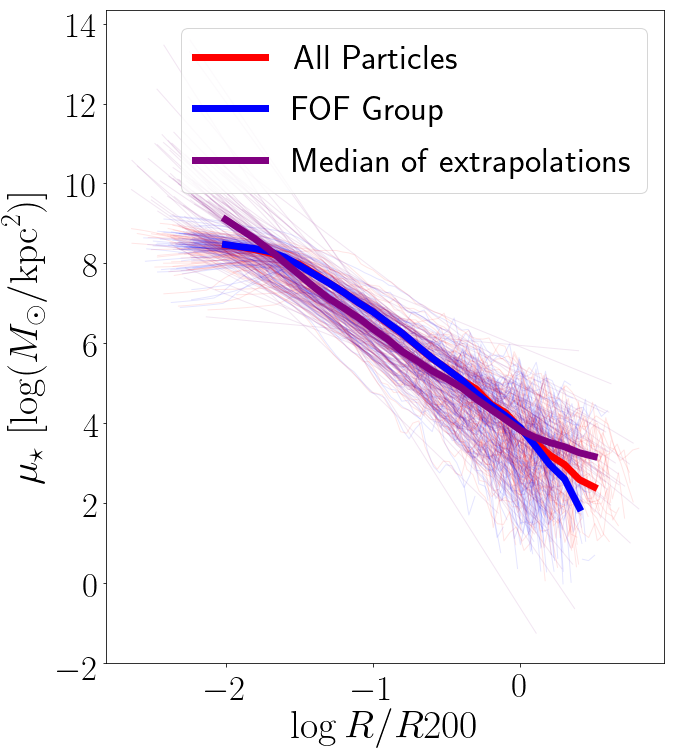

In [113]:
fig = plt.figure(figsize=(10, 12))
ax1 = plt.subplot()
logr200_bins = np.arange(-2, 0.6, 0.1)
    
for i in range(len(Group_IDs)):
    full_particles_iso = full_particles_isos[i]
    fof_particles_iso = fof_particles_isos[i]
    
    r200 = R200[i]
    extrapolated_mu = extrapolated_mus[i]
#     ax1 = plt.subplot()

    ax1.plot(np.log10(full_particles_iso['sma_kpc']/r200 ),
                 np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=.1, 
                     color = 'r', label='_nolegend_')

    ax1.plot(np.log10(fof_particles_iso['sma_kpc']/r200 ),
                 np.log10(fof_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=.1, 
                     color = 'b', label='_nolegend_')
        
    ax1.plot(np.log10(full_particles_iso['sma_kpc']/r200 ),
                 np.log10(extrapolated_mu)+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=.1, 
                     color = 'purple', label='_nolegend_')
    
#     #plot region where power law is being fit (50-100kpc)
#     ax1.plot(np.log10([50,100]/r200),
#              np.interp([50,100],full_particles_iso['sma_kpc'], np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0)),
#              c='purple', linewidth=10, alpha=0.45 )
    
#     plt.show()
                 
## median profiles for tng
median_mu_full = get_median_profile(full_particles_isos, pixel_scale = 1, r_bins = logr200_bins,
                                    quantity = 'intens_kpc', R200=R200_sample)
median_mu_FOF = get_median_profile(fof_particles_isos, pixel_scale = 1, r_bins = logr200_bins,
                                   quantity = 'intens_kpc', R200=R200_sample)

median_mu_extrap = np.nanmedian(np.stack([interp1d(np.log10(full_particles_isos[j]['sma_kpc']/R200[j]), 
                                               np.log10(extrapolated_mus[j]),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(logr200_bins) 
                               for j in range(len(extrapolated_mus))]), axis=0) 

ax1.plot(logr200_bins, median_mu_full+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='r',
         label = 'All Particles')
ax1.plot(logr200_bins, median_mu_FOF+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='b',
         label='FOF Group')
ax1.plot(logr200_bins, median_mu_extrap+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='purple',
         label='Median of extrapolations')

######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 2500**0.25)
# ax1.set_ylim(0, 10)

ax1.tick_params(axis='both', which='major', labelsize=35)

ax1.legend(loc= 'best', fontsize=35)


ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot}/\mathrm{kpc}^2)]$', fontsize=40)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=40)


plt.show()

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10


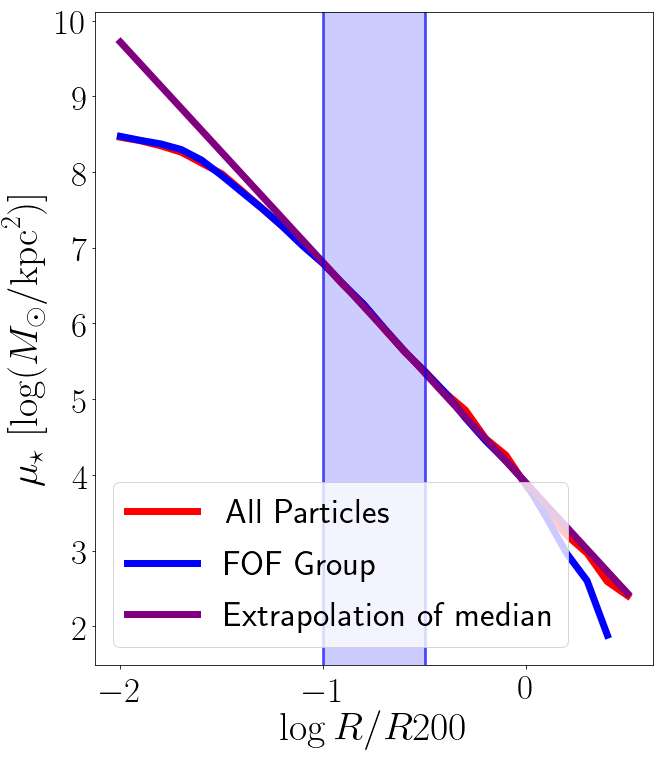

In [142]:
fig = plt.figure(figsize=(10, 12))
ax1 = plt.subplot()
logr200_bins = np.arange(-2, 0.6, 0.1)
    
# for i in range(len(Group_IDs)):
#     full_particles_iso = full_particles_isos[i]
#     fof_particles_iso = fof_particles_isos[i]
    
#     r200 = R200[i]
#     extrapolated_mu = extrapolated_mus[i]
# #     ax1 = plt.subplot()

#     ax1.plot(np.log10(full_particles_iso['sma_kpc']/r200 ),
#                  np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=.1, 
#                      color = 'r', label='_nolegend_')

#     ax1.plot(np.log10(fof_particles_iso['sma_kpc']/r200 ),
#                  np.log10(fof_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=.1, 
#                      color = 'b', label='_nolegend_')
        
#     ax1.plot(np.log10(full_particles_iso['sma_kpc']/r200 ),
#                  np.log10(extrapolated_mu)+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=.1, 
#                      color = 'purple', label='_nolegend_')
    
#     #plot region where power law is being fit (50-100kpc)
#     ax1.plot(np.log10([50,100]/r200),
#              np.interp([50,100],full_particles_iso['sma_kpc'], np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0)),
#              c='purple', linewidth=10, alpha=0.45 )
    
#     plt.show()
                 
## median profiles for tng
median_mu_full = get_median_profile(full_particles_isos, pixel_scale = 1, r_bins = logr200_bins,
                                    quantity = 'intens_kpc', R200=R200_sample)
median_mu_FOF = get_median_profile(fof_particles_isos, pixel_scale = 1, r_bins = logr200_bins,
                                   quantity = 'intens_kpc', R200=R200_sample)

#fit power law to median profiles

# median_mu_extrap = fit_power_law_to_median_iso_with_R200(logr200_bins, median_mu_full) 
median_mu_extrap = np.polyfit(logr200_bins[(logr200_bins>-1) & (logr200_bins<-0.5)],
                              median_mu_full[(logr200_bins>-1) & (logr200_bins<-0.5)], 1)
median_mu_extrap = np.poly1d(median_mu_extrap)


ax1.plot(logr200_bins, median_mu_full+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='r',
         label = 'All Particles')
ax1.plot(logr200_bins, median_mu_FOF+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='b',
         label='FOF Group')
ax1.plot(logr200_bins, median_mu_extrap(logr200_bins)+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='purple',
         label='Extrapolation of median')

ax1.axvline(-1, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
ax1.axvline(-0.5, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
ax1.axvspan(-1, -0.5, alpha=0.2, color='b')

######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 2500**0.25)
# ax1.set_ylim(0, 10)

ax1.tick_params(axis='both', which='major', labelsize=35)

ax1.legend(loc= 'best', fontsize=35)


ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot}/\mathrm{kpc}^2)]$', fontsize=40)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=40)


plt.show()

In [ ]:
#compare mass at Rvir 2D vs extrap